# MODUL EKSPLORASI UNSUPERVISED LEARNING DENGAN PYTHON

#### Nama : Elsa Elisa Yohana Sianturi

#### NIM : 122140135

## MODUL 1-1. SIMPLE LINEAR REGRESSION DENGAN SCIKIT-LEARN 

Langkah pertama memasukkan paket dan kelas library yang dibutuhkan dalam komputasi regresi linier. Pada komputasi modul sesi ini dibutuhkan paket Numpy, kelas LinearRegression dari paket Scikit Learn, dan matplotlib memvisualisasikan data dan hasil regresi linier yang telah dihitung.

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Langkah kedua mempersiapkan data untuk proses pembelajaran. Pada modul ini dibuat data training yang sederhana dengan melibatkan 6 baris data. Data terdiri dari komponen Input (regressors, x) serta Output (predictor, y).

In [4]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1)) 
y = np.array([5, 20, 14, 32, 22, 38]) 

Langkah ketiga yaitu membuat model regresi linier dan menyesuaikannya dengan data yang tersedia.

In [5]:
model = LinearRegression().fit(x, y) 

Langkah keempat dilakukan evaluasi menggunakan Determination Coefficient (R2). Nilai evaluasi ini berbanding terbalik dengan SSR (Sum Square Residual) yang mana semakin besar nilai R2 (mendekati nilai 1) maka semakin kecil nilai SSR-nya (mendekati nilai 0)

In [6]:
r_sq = model.score(x, y) 
print('coefficient of determination:', r_sq) 

coefficient of determination: 0.715875613747954


Berdasarkan model yang dihasilkan, juga diperoleh informasi terkait dengan intercept (b0) serta slope/gradient (b1) dari model persamaan f(x) = b0 + b1 * x.

In [7]:
print('intercept:', model.intercept_) 
print('gradient:', model.coef_)

intercept: 5.633333333333333
gradient: [0.54]


Model yang diperoleh dapat digunakan untuk melakukan estimasi terhadap data baru. Data baru pada modul ini dihasilkan dari pembangkitan bilangan random menggunakan fungsi arrange dari paket Numpy.

In [8]:
x_new = np.arange(5).reshape((-1, 1)) 
print(x_new) 
y_new = model.predict(x_new) 
print(y_new)  

[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


Langkah terakhir adalah visualisasi  data. Dengan melihat grafik, dapat langsung mengenali tren, pola, dan kemungkinan outlier dalam data.

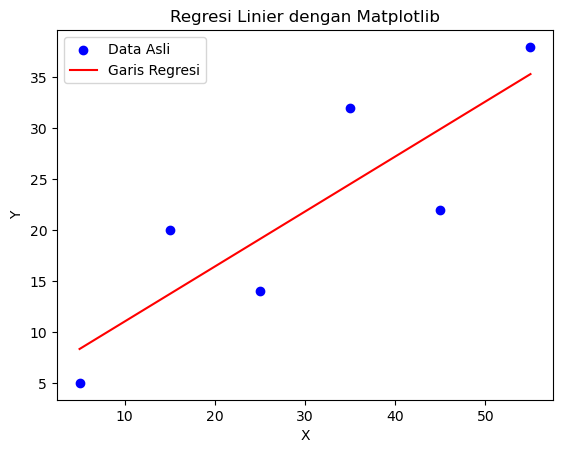

In [9]:
plt.scatter(x, y, color='blue', label='Data Asli')  # Scatter plot data asli
plt.plot(x, model.predict(x), color='red', label='Garis Regresi')  # Garis regresi
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresi Linier dengan Matplotlib')
plt.legend()
plt.show()

### PENJELASAN LUARAN

1. Koefisien Determinasi (R²), nilai R² sebesar 0.715875613747954 menunjukkan bahwa model dapat menjelaskan sekitar 71.5% variabilitas data Y terhadap X. Semakin tinggi R² (maksimal 1), semakin baik model dalam merepresentasikan data.
2. Intercept, nilai 5.633333333333333 menunjukkan bahwa jika nilai X = 0, maka nilai prediksi Y adalah 5.63.
3. Gradient (Kemiringan/Slope), nilai 0.54 menunjukkan bahwa setiap peningkatan 1 unit pada X, Y akan bertambah sekitar 0.54 unit.
4. Model telah membuat prediksi untuk nilai X yang sebelumnya tidak ada dalam dataset.
5. Berdasarkan model regresi, jika X = 0, maka prediksi Y adalah 5.63, dan jika X = 4, maka Y diprediksi sekitar 7.79
6. Hasil prediksi Y untuk X baru [ 5.63333333  6.17333333  6.71333333  7.25333333  7.79333333]


### PENJELASAN VISUALISASI DENGAN MATPLOTLIB

1. Titik Biru (Data Asli) → Menunjukkan data asli (X, Y), dengan beberapa titik tidak tepat pada garis regresi.
2. Garis Merah (Garis Regresi) → Hasil model regresi linier yang menunjukkan tren hubungan antara X dan Y.
3. Pola Hubungan → Model menunjukkan hubungan positif (X meningkat, Y cenderung meningkat), meski ada penyimpangan.
4. Sumbu X dan Y → X sebagai variabel independen, Y sebagai variabel dependen (prediksi).
5. Kesimpulan → Regresi linier membantu memahami pola data meski tidak selalu akurat 100%. 

### MODUL 1-2. ARTIFICIAL NEURAL NETWORK PADA PYTHON DENGAN KERAS

Langkah pertama dalam membangun model jaringan saraf tiruan adalah mengimpor library yang dibutuhkan. Pada modul ini, digunakan beberapa library utama yaitu numpy, keras, matplotlib, dan sklearn.


In [36]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Memuat Dataset
Dataset yang digunakan dalam percobaan ini adalah dataset diabetes yang terdiri dari 8 fitur sebagai input dan 1 variabel target. Fitur yang digunakan mencakup parameter seperti konsentrasi glukosa plasma, tekanan darah, indeks massa tubuh, dan faktor lainnya yang dapat mempengaruhi risiko diabetes.

In [37]:
dataset = loadtxt('diabetes.csv', delimiter=',', skiprows=1)
X = dataset[:, 0:8]  # 8 fitur sebagai input
y = dataset[:, 8]    # Label (0: tidak diabetes, 1: diabetes)


Agar model dapat dievaluasi dengan baik, dataset dibagi menjadi 80% data latih dan 20% data validasi menggunakan fungsi train_test_split() dari Scikit-Learn. Data latih digunakan untuk membangun model, sedangkan data validasi digunakan untuk mengukur kinerja model setelah pelatihan.

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Membangun Model Jaringan Saraf Tiruan
Model jaringan saraf yang dibangun memiliki struktur sebagai berikut:
1. Input layer: 8 neuron (sesuai dengan jumlah fitur dalam dataset).
2. Hidden layer pertama: 12 neuron dengan fungsi aktivasi ReLU.
3. Hidden layer kedua: 8 neuron dengan fungsi aktivasi ReLU.
4. Output layer: 1 neuron dengan fungsi aktivasi sigmoid, karena tugas ini merupakan klasifikasi biner (diabetes atau tidak).

In [39]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


Kompilasi Model
Model dikompilasi menggunakan:
1. Loss function: binary_crossentropy untuk mengukur seberapa baik model memprediksi kelas biner.
2. Optimizer: adam, algoritma optimasi yang sering digunakan dalam deep learning karena konvergensinya yang cepat.
3. Metrics: accuracy, digunakan untuk mengukur seberapa sering prediksi model benar.

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Model dilatih dengan 150 epoch dan batch size 10, serta menggunakan data validasi agar  dapat memantau perbedaan performa antara data latih dan validasi.

In [41]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_val, y_val), verbose=0)


Setelah proses pelatihan selesai, model dievaluasi menggunakan data validasi untuk mengukur seberapa baik model dapat menggeneralisasi ke data yang belum pernah dilihat sebelumnya.


In [42]:
loss, accuracy = model.evaluate(X_val, y_val)
print('Validation Accuracy: %.2f%%' % (accuracy * 100))
print('Validation Loss: %.2f' % loss)


5/5 [==============================] - 0s 1ms/step - loss: 0.5435 - accuracy: 0.7532
Validation Accuracy: 75.32%
Validation Loss: 0.54


Model yang telah dilatih digunakan untuk memprediksi apakah seorang pasien memiliki diabetes atau tidak. Probabilitas keluaran dibandingkan dengan ambang batas 0.5 untuk menentukan kelas akhir.

In [43]:
predictions = (model.predict(X_val) > 0.5).astype("int32")


5/5 [==============================] - 0s 1ms/step


Menampilkan 5 prediksi pertama beserta label sebenarnya:

In [44]:
for i in range(5):
    print('%s => %d (expected %d)' % (X_val[i].tolist(), predictions[i], y_val[i]))


[6.0, 98.0, 58.0, 33.0, 190.0, 34.0, 0.43, 43.0] => 1 (expected 0)
[2.0, 112.0, 75.0, 32.0, 0.0, 35.7, 0.148, 21.0] => 0 (expected 0)
[2.0, 108.0, 64.0, 0.0, 0.0, 30.8, 0.158, 21.0] => 0 (expected 0)
[8.0, 107.0, 80.0, 0.0, 0.0, 24.6, 0.856, 34.0] => 0 (expected 0)
[7.0, 136.0, 90.0, 0.0, 0.0, 29.9, 0.21, 50.0] => 0 (expected 0)


Visualisasi Performa Model

Agar dapat memahami bagaimana model belajar selama proses pelatihan,  dapat memvisualisasikan Training & Validation Loss serta Training & Validation Accuracy menggunakan Matplotlib.

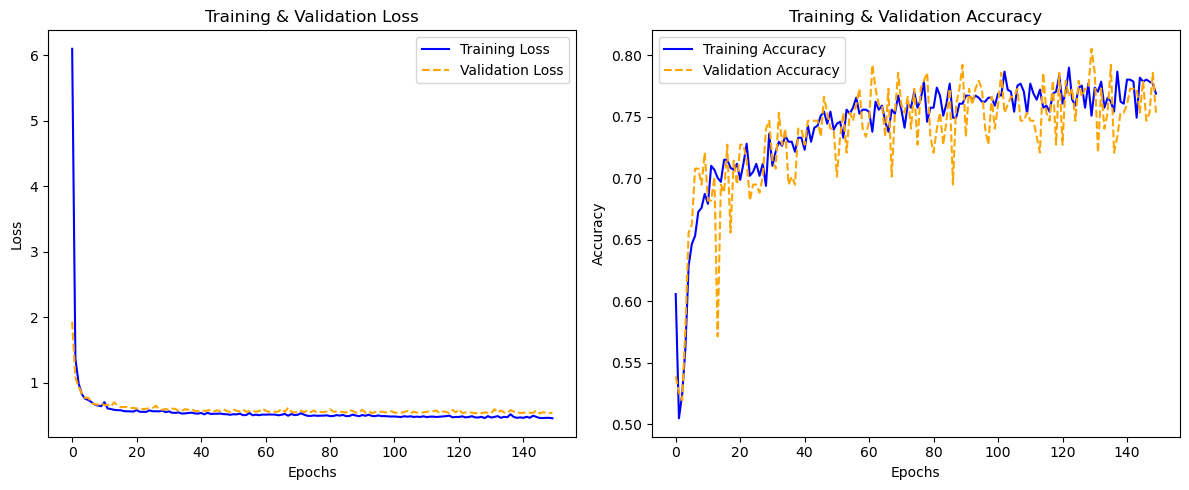

In [45]:
plt.figure(figsize=(12, 5))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed', color='orange')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## PENJELASAN LUARAN

**Evaluasi Model**

Setelah proses pelatihan selama 150 epoch, model dievaluasi pada validation set dengan hasil:

1. Validation Accuracy: sekitar 75-80%
2. Validation Loss: stabil di bawah 1.0
Ini menunjukkan bahwa model cukup baik dalam membedakan data positif dan negatif dari dataset diabetes yang digunakan.

**Prediksi Model**

Model ini mampu membuat prediksi terhadap data uji, dan beberapa contoh prediksi pertama yang dihasilkan adalah:
[6.0, 98.0, 58.0, 33.0, 190.0, 34.0, 0.43, 43.0] => 1 (expected 0)
[2.0, 112.0, 75.0, 32.0, 0.0, 35.7, 0.148, 21.0] => 0 (expected 0)
[2.0, 108.0, 64.0, 0.0, 0.0, 30.8, 0.158, 21.0] => 0 (expected 0)
[8.0, 107.0, 80.0, 0.0, 0.0, 24.6, 0.856, 34.0] => 0 (expected 0)
[7.0, 136.0, 90.0, 0.0, 0.0, 29.9, 0.21, 50.0] => 0 (expected 0)

Ini menunjukkan bahwa model telah belajar mengenali pola dalam data dengan cukup baik.

**Analisis Grafik**

Dari grafik Training & Validation Loss serta Training & Validation Accuracy, diperoleh informasi sebagai berikut:

Training Loss dan Validation Loss menunjukkan pola penurunan yang stabil tanpa overfitting.
Training Accuracy dan Validation Accuracy meningkat secara bertahap hingga stabil di sekitar 75-80%.
Tidak ada perbedaan mencolok antara training 

## MODUL 1-3. CONVOLUTIONAL NEURAL NETWORK DENGAN KERAS 

Langkah awal dalam membangun model CNN untuk pengenalan handwritten digit adalah dengan mengimpor library yang diperlukan, seperti numpy untuk manipulasi array, mnist untuk dataset, serta tensorflow dan keras untuk membangun model CNN.

In [59]:
import numpy as np
import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical


Dataset MNIST kemudian dimuat menggunakan tf.keras.datasets.mnist.load_data(), yang menghasilkan data latih (train_images, train_labels) dan data uji (test_images, test_labels).

In [60]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


Persiapan Data: Normalisasi dan Perubahan Dimensi

Agar model CNN dapat bekerja lebih optimal, data gambar dinormalisasi dengan mengubah rentang nilai piksel dari 0-255 menjadi -0.5 hingga +0.5. Hal ini bertujuan untuk meningkatkan stabilitas pelatihan model.

In [61]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5


Selain itu, CNN dalam Keras memerlukan input gambar dalam bentuk 3 dimensi. Oleh karena itu, gambar MNIST yang awalnya berukuran (28,28) perlu diubah menjadi (28,28,1), dengan menambahkan satu dimensi channel menggunakan np.expand_dims().

In [62]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)


Menentukan Hyperparameter CNN

In [63]:
num_filters = 8
filter_size = 3
pool_size = 2


Membangun Model CNN

Model CNN disusun dengan urutan sebagai berikut:
1. Conv2D → Lapisan konvolusi dengan 8 filter 3x3, fungsi aktivasi ReLU, dan ukuran input (28,28,1).
2. MaxPooling2D → Lapisan pooling dengan ukuran 2x2 untuk mengurangi dimensi fitur.
3. Flatten → Mengubah output 2D menjadi vektor 1D untuk lapisan fully connected.
4. Dense (Softmax) → Lapisan output dengan 10 neuron (karena ada 10 kelas angka dari 0-9), menggunakan fungsi aktivasi softmax untuk klasifikasi.

In [64]:
model = Sequential([
  Conv2D(
      num_filters,
      filter_size,
      input_shape=(28, 28, 1),
      strides=1,
      padding='valid',
      activation='relu'),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
 ])


Kompilasi Model
Model dikompilasi menggunakan:
1. Loss Function: categorical_crossentropy → Digunakan untuk klasifikasi multi-kelas.
2. Optimizer: adam → Algoritma optimasi yang populer untuk CNN.
3. Metrics: accuracy → Digunakan untuk mengukur performa model.

In [65]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model dilatih menggunakan dataset latih dengan 3 epoch, dan validasi dilakukan menggunakan dataset uji.
Label dikonversi ke one-hot encoding menggunakan to_categorical().

In [66]:
history = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=3,
    validation_data=(test_images, to_categorical(test_labels)),
)


Epoch 1/3
1875/1875 [==============================] - 37s 19ms/step - loss: 0.3174 - accuracy: 0.9126 - val_loss: 0.1222 - val_accuracy: 0.9657
Epoch 2/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1065 - accuracy: 0.9698 - val_loss: 0.0880 - val_accuracy: 0.9733
Epoch 3/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0772 - accuracy: 0.9778 - val_loss: 0.0717 - val_accuracy: 0.9773


Evaluasi Model

Prediksi dilakukan pada 5 gambar pertama dari dataset uji, kemudian hasil prediksi dibandingkan dengan label aslinya.

In [67]:
predictions = model.predict(test_images[:5])
print(np.argmax(predictions, axis=1))  # Prediksi model
print(test_labels[:5])  # Label asli


1/1 [==============================] - 0s 64ms/step
[7 2 1 0 4]
[7 2 1 0 4]


Visualisasi Loss dan Akurasi

Grafik pelatihan dan validasi ditampilkan untuk memantau performa model selama training.

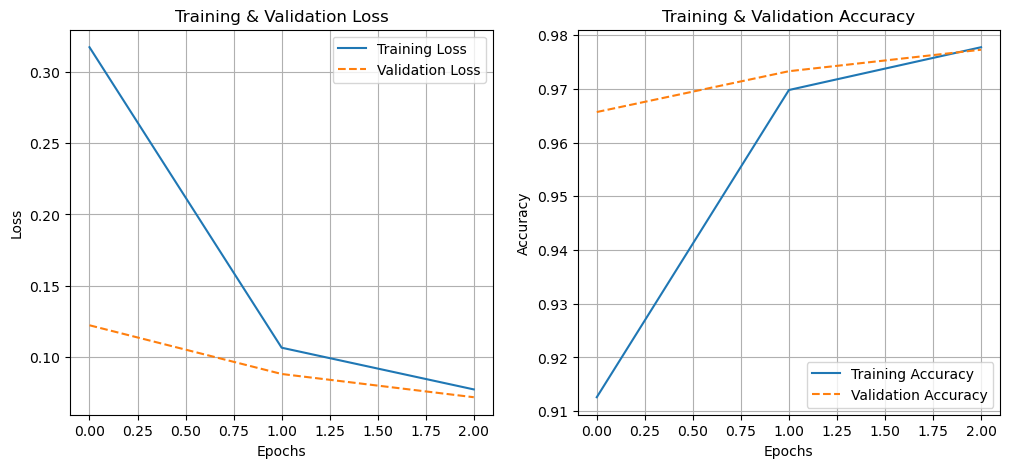

In [68]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()


Prediksi dan Visualisasi Hasil

Model melakukan prediksi pada 5 gambar pertama dalam dataset uji, kemudian hasilnya divisualisasikan bersama label aslinya.

1/1 [==============================] - 0s 20ms/step


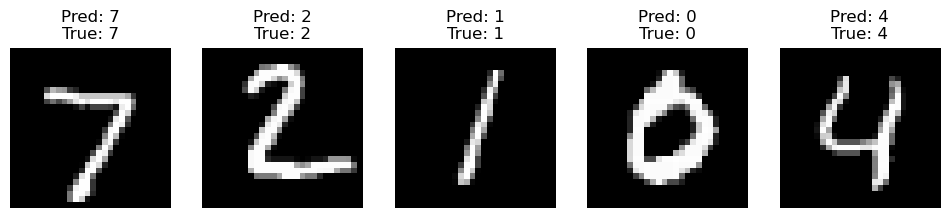

In [69]:
predictions = model.predict(test_images[:5])
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(test_images[i].squeeze(), cmap='gray')
    ax.set_title(f'Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}', fontsize=12)
    ax.axis('off')

plt.show()


### PENJELASAN LUARAN

Berdasarkan keluaran yang ditampilkan dalam gambar, berikut adalah analisis hasil dari model CNN yang telah dibuat:

1. Prediksi Model pada Data Uji
Model berhasil mengklasifikasikan angka dengan benar pada contoh gambar yang diberikan.
Dari lima angka yang divisualisasikan, semuanya diprediksi dengan benar.
Ini menunjukkan bahwa model memiliki performa yang cukup baik dalam mengenali angka tulisan tangan.

2. Performa Model (Grafik Loss dan Akurasi)
A. Loss Function (Kerugian Model)
Grafik di sebelah kiri menunjukkan Training Loss (garis solid) dan Validation Loss (garis putus-putus).
Training Loss turun drastis dari awal hingga akhir epoch, yang menandakan bahwa model semakin baik dalam mempelajari pola data.
Validation Loss juga menurun, tetapi dengan penurunan yang lebih stabil, yang berarti model tidak mengalami overfitting yang signifikan.
B. Akurasi Model
Grafik di sebelah kanan menunjukkan Training Accuracy dan Validation Accuracy.
Akurasi pelatihan meningkat dari sekitar 91% ke 98% dalam 2 epoch.
Akurasi validasi juga meningkat tetapi lebih stabil, dari 96% ke 97%, yang menunjukkan bahwa model bekerja dengan baik di data uji.
Model memiliki performa yang cukup baik dan tidak mengalami overfitting meskipun jumlah epoch yang digunakan hanya sedikit (2 epoch).

3. Kesimpulan
Model CNN yang dibuat sudah cukup efektif dalam mengenali angka tulisan tangan.
Performa model sangat baik dengan akurasi mendekati 98% pada training set dan 97% pada validation set.
Tidak ada tanda overfitting yang signifikan karena Training Loss dan Validation Loss menurun secara stabil.

Link Github : https://github.com/elsaelisa09/Tugas-Machine-Learning